# Geometrical spreading of sound
As a point source extends from its origin, the intensity diminishes inversely proportional to the distance traveled, following the Inverse-square law. In the context of noise propagation, this phenomenon significantly influences the attenuation of turbine noise levels.

<img src="../../jupyter-book/images/inverse_square_law.png" alt="inverse_square_law" width="600px" class="bg-primary"/>

*Fig 1: S denotes the noise source, and r represents the measured points. The lines illustrate noise propagation from the sources. The total noise lines, linked to source strength, remain constant, but denser lines indicate a louder noise field. The line density is inversely proportional to distance from the source squared, reflecting increased surface area on a sphere. Consequently, noise intensity inversely scales with the square of the distance from the source ([Source](https://en.wikipedia.org/wiki/Inverse-square_law)).*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

## Derivation

The intensity, $I$, measured in watts per square meter ($W/m^2$), is a fundamental quantity in acoustics. The sound power of a source, denoted as $P$, can be related to intensity through the formula:

$$ I = \dfrac{P}{4 \pi r^2} = \dfrac{p^2}{\rho c} = \dfrac{p^2}{z_0} $$

Here, $z_0$ represents the characteristic specific acoustic impedance as is equal to $z_0 = 400 \text{Pa} \cdot \text{s}/\text{m}$.

Rearranging the equation in terms of sound power $P$, we get:

$$ P = \dfrac{p^2}{z_0}4 \pi r^2 $$

In the context of a reference sound power $P_0 = 10^{-12} \text{W}$, the ratio $\dfrac{P}{P_0}$ can be expressed as:

$$ \dfrac{P}{P_0} = \dfrac{p_0^2}{P_0} \dfrac{p^2}{p_0^2} \dfrac{1}{z_0} 4 \pi r^2$$

Where the reference sound pressure is $p_0 = 2\cdot 10^{-5} \text{Pa}$. Taking the logarithm of both sides, we arrive at:

$$ 10\log\left(\dfrac{P}{P_0}\right) = 10\log\left(\dfrac{p_0^2}{P_0} \dfrac{p^2}{p_0^2} \dfrac{1}{z_0} 4 \pi r^2\right) $$

This expression can be further simplified to represent the sound power level as $L_W = 10\log\left(\dfrac{P}{P_0}\right)$ and the sound pressure level as $L_P = 10\log\left(\dfrac{p^2}{p_0^2}\right)$:

$$ L_W = L_P + 10\log\left(\dfrac{p_0^2}{P_0 z_0}4 \pi r^2\right) $$

With the used reference values $\dfrac{p_0^2}{P_0 z_0} = 1$, and the equation simplifies to:

$$ L_W = L_P + 20\log(r) + 10\log(4 \pi) $$

Lastly, be rearranging the equation, the final expression for the sound pressure level can be found:

$$ L_P = L_W - 20\log(r) - 10\log(4 \pi) \approx  L_W - 20\log(r) - 11 $$

This derivation provides insights into the relationship between sound power, intensity, and their representation in logarithmic scales.

### Application of function
Utilizing the formula on a fluctuating noise signal, oscillating between 0 dB and 100 dB, reveals the impact of geometrical spreading on the noise amplitude. It's worth mentioning that this effect is not exclusive to oscillating values; I chose to create the plot simply because of its visually interesting representation.

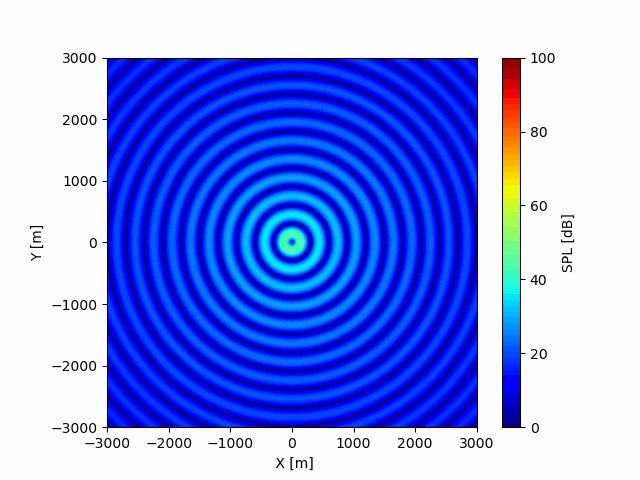

In [2]:
width = 3000  # Width of the simulation grid
height = width  # Height of the simulation grid
center_x =0 # # X-coordinate of the point source
center_y = 0 #  # Y-coordinate of the point source
frequency = 0.5 # frequency
amplitude = 100  # Amplitude of the oscillation
speed = 300  # Speed of wave propagation
duration = 3 # Duration of the simulation
fps = 10  # Frames per second
res = 500
wavelength = speed / frequency
angular_frequency = 2 * np.pi * frequency
wave_number = 2 * np.pi / wavelength

x, y = np.meshgrid(np.linspace(-width, width, res), np.linspace(-height, height, res))

fig,ax = plt.subplots()
time = 0 / fps
distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
wave = np.abs(np.maximum(0, (amplitude - 20*np.log10(distance) - 11)) * np.sin(angular_frequency * time - wave_number * distance))
cb = ax.imshow(wave, cmap='jet', origin='lower', extent=[-width, width, -height, height], vmin=0, vmax=amplitude)
plt.colorbar(cb, ax= ax, label = "SPL [dB]")
ax.set(xlabel= " X [m]",
       ylabel = "Y [m]")
plt.close()
def update(frame):
    global grid
    time = frame / fps
    distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
    wave = np.abs(np.maximum(0,(amplitude - 20*np.log10(distance) - 11)) * np.sin(angular_frequency * time - wave_number* distance))
    ax.imshow(wave, cmap='jet', origin='lower', extent=[-width, width, -height, height], vmin=0, vmax=amplitude)
animation = FuncAnimation(fig, update, frames= int(duration * fps), interval= 1/fps)

animation.save('../../temp/ripple.gif',writer=PillowWriter(fps=fps))
Image(open('../../temp/ripple.gif','rb').read())